In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings(action = "ignore")

In [2]:
data = pd.read_csv("Chennai house data.csv")
data.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872,Ready to move,2,NaN,1.0,Sembakkam,MP Developers
1,93.54,1346,Under Construction,3,2.0,NaN,Selaiyur,DAC Promoters
2,151.00,2225,Under Construction,3,NaN,0.0,Mogappair,Casagrand Builder Private Limited
3,49.00,1028,Ready to move,2,2.0,3.0,Ambattur,Dugar Housing Builders
4,42.28,588,Under Construction,2,1.0,0.0,Pallavaram,Radiance Realty Developers India Ltd


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  1403 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [4]:
data['bathroom'].unique()

array([nan,  2.,  1.,  3.,  4.,  5.,  6.,  7.])

In [5]:
data['bathroom'].fillna(method = 'bfill', inplace = True)

In [6]:
data['bathroom'].unique()

array([2., 1., 3., 4., 5., 6., 7.])

In [ ]:
data['age'].unique()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  2620 non-null   float64
 5   age       1729 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


In [8]:
data['age'].fillna(method = 'ffill', inplace = True)

In [9]:
data['age'].unique()

array([ 1.,  0.,  3.,  6.,  5.,  2.,  4., 11.,  7., 13.,  9., 12., 16.,
       17.,  8., 32.])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   int64  
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   int64  
 4   bathroom  2620 non-null   float64
 5   age       2620 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 163.9+ KB


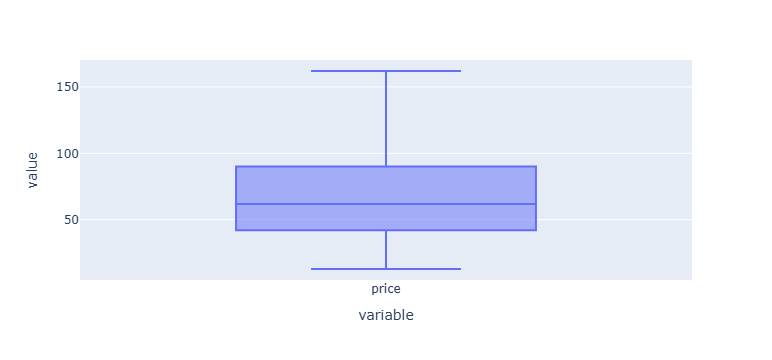

In [21]:
px.box(data['price'])

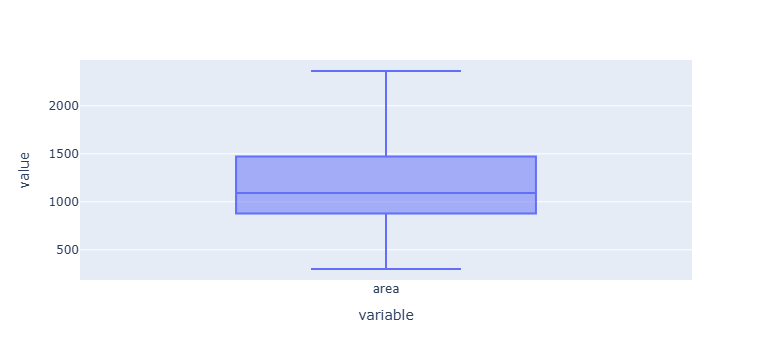

In [22]:
px.box(data['area'])

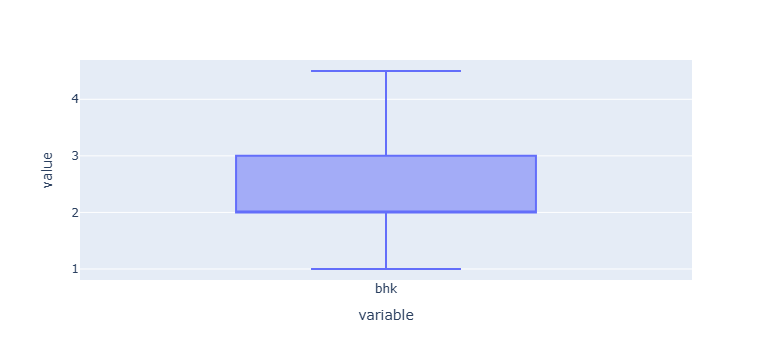

In [23]:
px.box(data['bhk'])

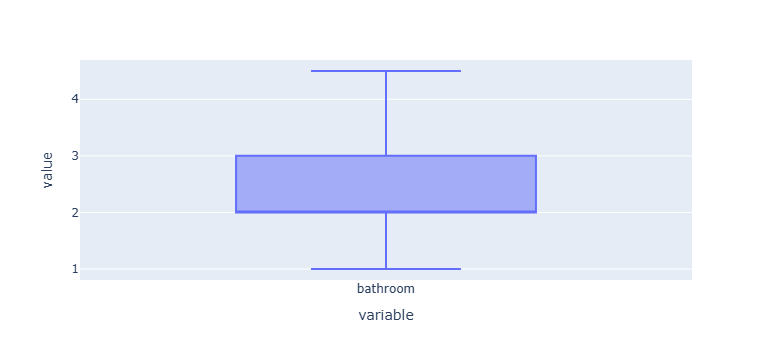

In [24]:
px.box(data['bathroom'])

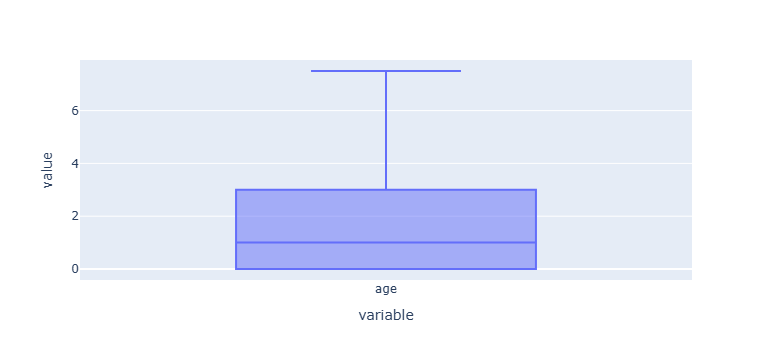

In [25]:
px.box(data['age'])

In [26]:
numcol = ['price', 'area', 'bhk', 'bathroom', 'age']

In [27]:
for col in numcol:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    print("column :",col)
    IQR = Q3 - Q1
    print(Q1,Q3,IQR)
    # Define bounds
    lbound = Q1 - 1.5 * IQR
    ubound = Q3 + 1.5 * IQR
    print(lbound,ubound)
    # Replace outliers with the respective bounds
    data[col] = np.where(data[col] > ubound, ubound, 
                            np.where(data[col] < lbound, lbound, data[col]))

column : price
42.0 90.0 48.0
-30.0 162.0
column : area
877.0 1471.25 594.25
-14.375 2362.625
column : bhk
2.0 3.0 1.0
0.5 4.5
column : bathroom
2.0 3.0 1.0
0.5 4.5
column : age
0.0 3.0 3.0
-4.5 7.5


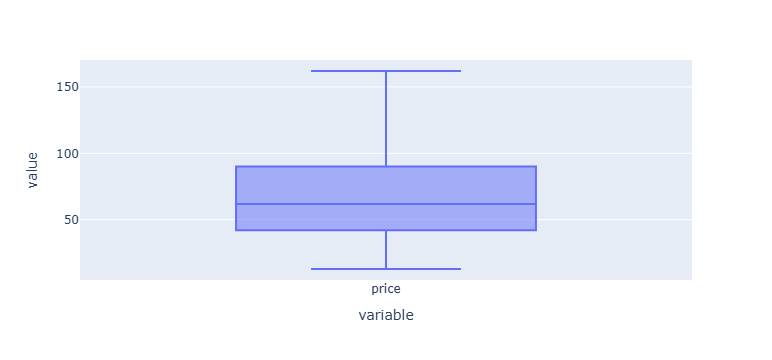

In [28]:
px.box(data['price'])

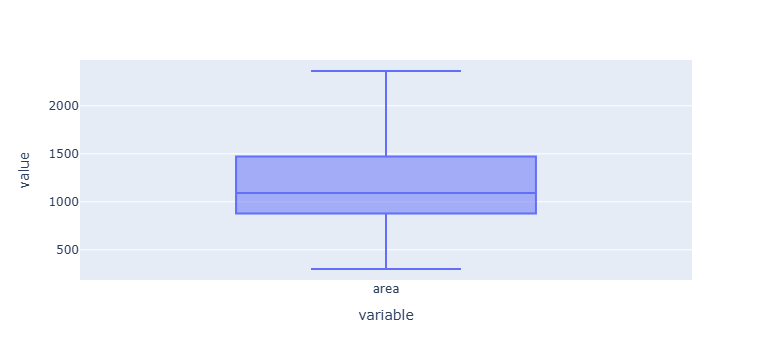

In [29]:
px.box(data['area'])

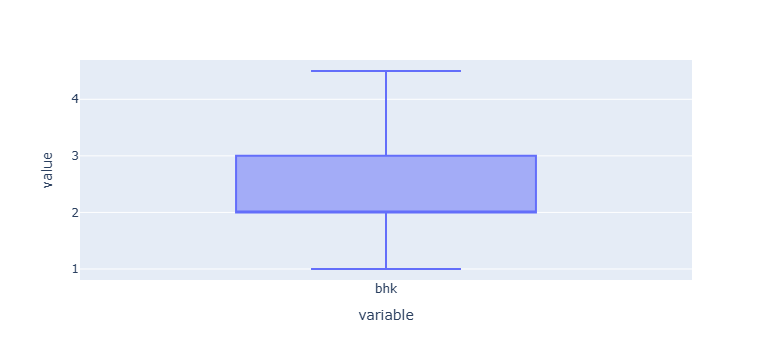

In [30]:
px.box(data['bhk'])

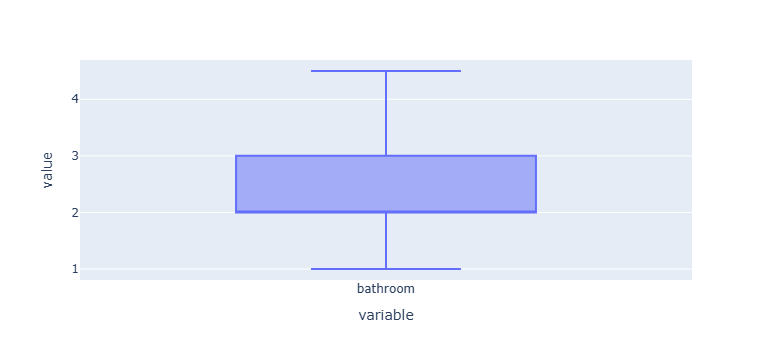

In [31]:
px.box(data['bathroom'])

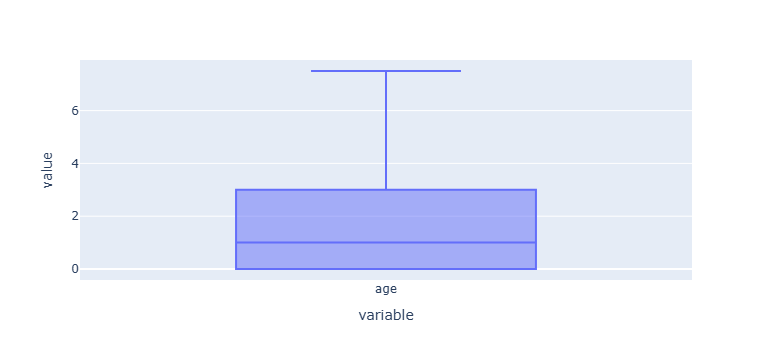

In [32]:
px.box(data['age'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2620 entries, 0 to 2619
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     2620 non-null   float64
 1   area      2620 non-null   float64
 2   status    2620 non-null   object 
 3   bhk       2620 non-null   float64
 4   bathroom  2620 non-null   float64
 5   age       2620 non-null   float64
 6   location  2620 non-null   object 
 7   builder   2620 non-null   object 
dtypes: float64(5), object(3)
memory usage: 163.9+ KB


In [34]:
data["status"].unique()

array(['Ready to move', 'Under Construction'], dtype=object)

In [35]:
data["status"] = data["status"].map({'Under Construction':0,'Ready to move':1})

In [36]:
data["status"].unique()

array([1, 0], dtype=int64)

In [37]:
data["location"].unique()

array(['Sembakkam', 'Selaiyur', 'Mogappair', 'Ambattur', 'Pallavaram',
       'Virugambakkam', 'Thirumazhisai', 'Moolakadai', 'Ottiyambakkam',
       'Perungalathur', 'Gerugambakkam', 'Anna Nagar', 'Gopalapuram',
       'Pammal', 'Porur', 'Navallur', 'Sholinganallur', 'Vanagaram',
       'T Nagar', 'Guindy', 'Madipakkam', 'Perumbakkam', 'Velachery',
       'Medavakkam', 'Gowrivakkam', 'Chromepet', 'Thalambur', 'Thandalam',
       'Ayanambakkam', 'Kanathur Reddikuppam', 'Adyar', 'Kolapakkam',
       'Thaiyur', 'Thoraipakkam OMR', 'Poonamallee', 'Padur',
       'East Tambaram', 'Tiruvottiyur', 'Iyappanthangal', 'Padappai',
       'Mugalivakkam', 'Kelambakkam', 'Thirumullaivoyal', 'Madhavaram',
       'Kundrathur', 'Vengaivasal', 'Siruseri', 'Manapakkam',
       'Karapakkam', 'Sithalapakkam', 'Madambakkam', 'Perungudi',
       'Vadapalani', 'Alwarpet', 'Thiruvidandhai', 'Kotturpuram',
       'Velappanchavadi', 'Kilpauk', 'Besant Nagar', 'Vellakkal', 'Avadi',
       'Kolathur', 'Thiruvanmi

In [38]:
data["builder"].unique()

array(['MP Developers', 'DAC Promoters',
       'Casagrand Builder Private Limited', 'Dugar Housing Builders',
       'Radiance Realty Developers India Ltd', 'Traventure Homes Pvt Ltd',
       'Urbanrise', 'Navin Housing Properties P LTD',
       'Jones foundation private limited', 'Isha Homes',
       'Kochar Homes Pvt Ltd', 'Pushkar Properties Pvt Ltd',
       'Asset Tree Homes', 'Urban Tree Infrastructures', 'Olympia Group',
       'Vijay Raja Homes Private Limited', 'Kamalam Builder Pvt Ltd',
       'Appaswamy Real Estate', 'VNR Homes', 'PS Srijan Developers',
       'Lifestyle Housing', 'Puravankara Limited', 'Jones Foundations',
       'Plaza Group', 'Urbando Housing LLP', 'EK Realtors',
       'The Nest Builder', 'Doshi Housing', 'Grandstyle constructions',
       'vinoth builders', 'GTK Foundations', 'Baashyaam Group', 'chris',
       'Krishna Constructions', 'AKS Housing Dedvelopment Pvt Ltd',
       'Mayances Construction and Engineering Services',
       'Ramaniyam Real Esta

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["location"] = le.fit_transform(data["location"])
data["builder"] = le.fit_transform(data["builder"])
data.head()

,price,area,status,bhk,bathroom,age,location,builder
0,37.49,872.0,1,2.0,2.0,1.0,137,60
1,93.54,1346.0,0,3.0,2.0,1.0,136,20
2,151.00,2225.0,0,3.0,2.0,0.0,82,18
3,49.00,1028.0,1,2.0,2.0,3.0,5,26
4,42.28,588.0,0,2.0,1.0,0.0,105,88


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['price']
X = scaler.fit_transform(data.drop(columns = ['price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['price']).columns)
X.head()

,area,status,bhk,bathroom,age,location,builder
0,-0.729629,0.87289,-0.566140,-0.444498,-0.389083,0.768583,-0.233426
1,0.248971,-1.14562,0.762375,-0.444498,-0.389083,0.748789,-1.127770
2,2.063716,-1.14562,0.762375,-0.444498,-0.888298,-0.320079,-1.172488
3,-0.407558,0.87289,-0.566140,-0.444498,0.609347,-1.844205,-0.993619
4,-1.315963,-1.14562,-0.566140,-1.832559,-0.888298,0.135180,0.392616


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Y = data['price']
X = scaler.fit_transform(data.drop(columns = ['price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['price']).columns)
X.head()

,area,status,bhk,bathroom,age,location,builder
0,0.277317,1.0,0.285714,0.285714,0.133333,0.774011,0.447761
1,0.507121,0.0,0.571429,0.285714,0.133333,0.768362,0.149254
2,0.933277,0.0,0.571429,0.285714,0.000000,0.463277,0.134328
3,0.352948,1.0,0.285714,0.285714,0.400000,0.028249,0.194030
4,0.139628,0.0,0.285714,0.000000,0.000000,0.593220,0.656716


In [42]:
X.corr()

,area,status,bhk,bathroom,age,location,builder
area,1.000000,0.036905,0.839627,0.463652,-0.015512,-0.040621,-0.061380
status,0.036905,1.000000,0.015683,0.050069,0.558468,0.045159,0.147393
bhk,0.839627,0.015683,1.000000,0.521872,-0.025361,-0.052221,-0.035444
bathroom,0.463652,0.050069,0.521872,1.000000,-0.031052,0.017191,-0.044015
age,-0.015512,0.558468,-0.025361,-0.031052,1.000000,-0.054896,0.391375
location,-0.040621,0.045159,-0.052221,0.017191,-0.054896,1.000000,0.066975
builder,-0.061380,0.147393,-0.035444,-0.044015,0.391375,0.066975,1.000000


In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
model = lr.fit(x_train,y_train)

In [ ]:
predictions1 = lr.predict(x_test)
px.scatter(x = y_test,y = predictions1 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions1) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions1) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions1,squared=False)
accuracy  = lr.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
PF=PolynomialFeatures(degree=3, include_bias=False)
pf=PF.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(pf,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression 
pr = LinearRegression()
model = pr.fit(x_train,y_train)

In [ ]:
predictions2 = pr.predict(x_test)
px.scatter(x = y_test,y = predictions2 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions2) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions2) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions2,squared=False)
accuracy  = pr.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.linear_model import Ridge 
rimo = Ridge(alpha =0.5, tol = 0.01,solver ='auto', random_state = 100) 
rimo.fit(x_train, y_train)

In [ ]:
predictions3 = rimo.predict(x_test)
px.scatter(x = y_test,y = predictions3 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions3) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions3) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions3,squared=False)
accuracy  = rimo.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.linear_model import ElasticNet as en
enmo = en(alpha = 1.0, tol = 0.001, random_state = 100) 
enmo.fit(x_train, y_train)

In [ ]:
predictions4 = enmo.predict(x_test)
px.scatter(x = y_test,y = predictions4 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions4) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions4) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions4,squared=False)
accuracy  = enmo.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(X,Y,test_size = 0.1, random_state = 100)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
lrboost1 = AdaBoostRegressor(n_estimators=50,estimator=lr,learning_rate=1.0,loss='linear')
lrboost1.fit(x_train,y_train)

In [ ]:
lrboost2 = GradientBoostingRegressor(init= lr,n_estimators=100, random_state=100)
lrboost2.fit(x_train,y_train)

In [ ]:
predictions5 = lrboost1.predict(x_test)
px.scatter(x = y_test,y = predictions5 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
predictions6 = lrboost2.predict(x_test)
px.scatter(x = y_test,y = predictions6 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions5) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions5) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions5,squared=False)
accuracy  = lrboost1.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions6) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions6) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions6,squared=False)
accuracy  = lrboost2.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
prboost1 = AdaBoostRegressor(n_estimators=50,estimator=pr,learning_rate=1.0,loss='linear')
prboost1.fit(x_train,y_train)


In [ ]:
prboost2 = GradientBoostingRegressor(init= pr,n_estimators=100, random_state=100)
prboost2.fit(x_train,y_train)

In [ ]:
predictions7 = prboost1.predict(x_test)
px.scatter(x = y_test,y = predictions7 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
predictions8 = prboost2.predict(x_test)
px.scatter(x = y_test,y = predictions8 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions7) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions7) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions7,squared=False)
accuracy  = prboost1.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions8) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions8) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions8,squared=False)
accuracy  = prboost2.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
riboost1 = AdaBoostRegressor(n_estimators=50,estimator=rimo,learning_rate=1.0,loss='linear')
riboost1.fit(x_train,y_train)

In [ ]:
riboost2 = GradientBoostingRegressor(init= rimo,n_estimators=100, random_state=100)
riboost2.fit(x_train,y_train)

In [ ]:
predictions9 = riboost1.predict(x_test)
px.scatter(x = y_test,y = predictions9 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
predictions10 = riboost2.predict(x_test)
px.scatter(x = y_test,y = predictions10 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions9) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions9) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions9,squared=False)
accuracy  = riboost1.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions10) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions10) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions10,squared=False)
accuracy  = riboost2.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
enboost1 = AdaBoostRegressor(n_estimators=50,estimator=enmo,learning_rate=1.0,loss='linear')
enboost1.fit(x_train,y_train)

In [ ]:
enboost2 = GradientBoostingRegressor(n_estimators=50,init=enmo,learning_rate=1.0,loss='squared_error')
enboost2.fit(x_train,y_train)

In [ ]:
predictions11 = enboost1.predict(x_test)
px.scatter(x = y_test,y = predictions11 ,trendline = 'ols', trendline_color_override="black")


In [ ]:
predictions12 = enboost2.predict(x_test)
px.scatter(x = y_test,y = predictions12 ,trendline = 'ols', trendline_color_override="black")

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions11) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions11) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions11,squared=False)
accuracy  = enboost1.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error 

mae = mean_absolute_error(y_true=y_test,y_pred=predictions12) 
mse = mean_squared_error(y_true=y_test,y_pred=predictions12) #default=True 
rmse = mean_squared_error(y_true=y_test,y_pred=predictions12,squared=False)
accuracy  = enboost2.score(x_test, y_test)*100
print("MAE:",mae,"\n","MSE:",mse,"\n","RMSE:",rmse,"\n","Accuracy:",accuracy)